In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Carregando o dataset final

In [2]:
data = pd.read_csv('final_df.csv')

## Verificando a distribuição por módulo

In [3]:
data.module.value_counts()

M01    65
M02    58
M03    51
M07    46
M05    42
M04    36
M06    30
Name: module, dtype: int64

In [4]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.25
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for _, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)



In [5]:
def add_text(ax, title, x_label="", y_label=""):
	ax.set_title(title)
	ax.set_xlabel(x_label)
	ax.set_ylabel(y_label)

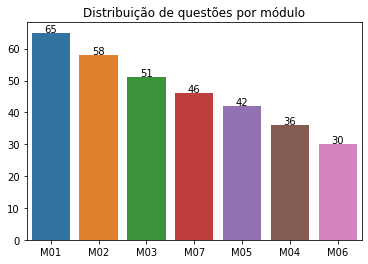

In [6]:
ax = sns.barplot(y=data.module.value_counts().values, x=data.module.value_counts().index)
show_values_on_bars(ax)
add_text(ax, "Distribuição de questões por módulo")

## Distribuição do tempo de implementação

In [7]:
tempo_foco = data.tempo_foco
median = tempo_foco.median()
mean = tempo_foco.mean()

above_median = data[tempo_foco > median] 
below_median = data[tempo_foco <= median] 

above_mean = data[tempo_foco > mean] 
below_mean = data[tempo_foco <= mean]

In [8]:
def histplot(x, limit, title, x_label, y_label=""):
	ax = sns.histplot(x=x)
	ax.set_title(title.capitalize())
	ax.set_xlabel(x_label)
	ax.set_ylabel(y_label)
	ax.set_ylim(0, limit)

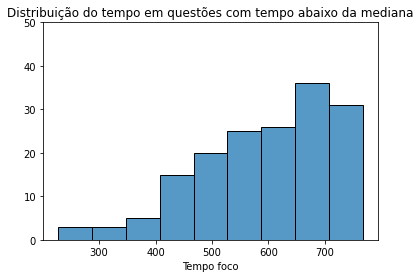

In [9]:
histplot(below_median.tempo_foco, 50,"Distribuição do tempo em questões com tempo abaixo da mediana", "Tempo foco")

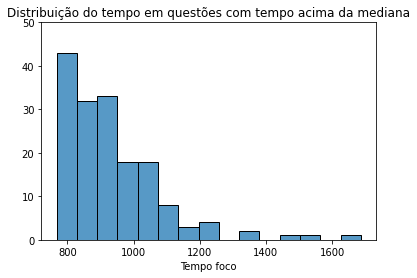

In [10]:
histplot(above_median.tempo_foco, 50,"Distribuição do tempo em questões com tempo acima da mediana", "Tempo foco")

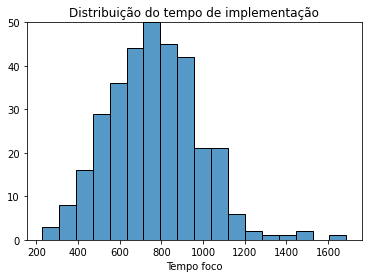

In [11]:
histplot(data.tempo_foco, 50,"Distribuição do tempo de implementação", "Tempo foco")

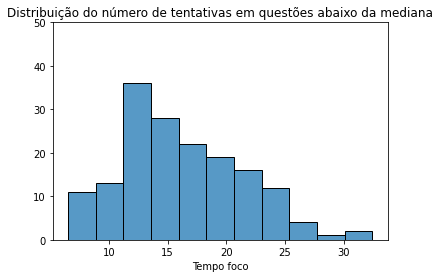

In [12]:
histplot(below_median.n_attempts, 50,"Distribuição do número de tentativas em questões abaixo da mediana", "Tempo foco")

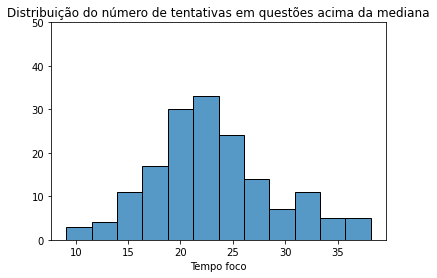

In [13]:
histplot(above_median.n_attempts, 50,"Distribuição do número de tentativas em questões acima da mediana", "Tempo foco")

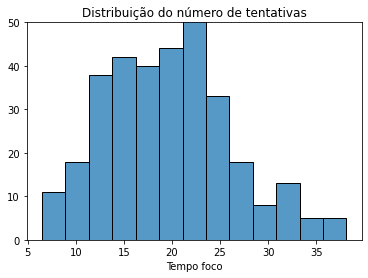

In [14]:
histplot(data.n_attempts, 50,"Distribuição do número de tentativas", "Tempo foco")